## Importing all the necessary Libraries

In [136]:
import numpy as np
from sklearn import linear_model, datasets
import json
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plot

## Function to implement Ransac Regressor from sklearn 

In [137]:
def RANSAC(observed_data,threshold):
    """
    observed_data: the set of obverserved data for fitting a linear regression 
        model.
    threshold: the threshold is used to differentiate inliers from outliers by
        testing the error deviation. You can use a predefined percentage as the
        threshold as we show in the class.
    """
    X,y = observed_data
 
    """    
    Write your codes here
    Find outliers and remove them from (X,y), return (newX,newY)
    """
    
    # Using ransac regressor from sklearn library to remove the inliers from the input data
    model = RANSACRegressor(residual_threshold = threshold, loss = 'absolute_error', max_trials = 500)
    RANSAC = model.fit(X,y)
    inlier_mask = model.inlier_mask_ # Considering only the inliers 

    
    # Then new data after removing the outliers from input data
    newX, newy = X[inlier_mask], y[inlier_mask]
    
    #Keep the following code unchanged
    return (newX,newy)


## RANSAC Implementation

In [138]:
#Use the following code to test your RANSAC implementation. 

with open('code-input.json','r') as infile:
    indata=json.load(infile)

X=np.array(indata['X']) 
y=np.array(indata['y'])   

newX,newy=RANSAC((X,y),0.01)

model = linear_model.LinearRegression()
model.fit(newX, newy)
yhat=model.predict(newX)

m_coef=model.coef_
m_intercept=model.intercept_

# keep the jason.dump part unchanged
outdata={'coef':m_coef.tolist(),'intercept':m_intercept.tolist()}
with open('output.json','w') as outfile:
    json.dump(outdata,outfile)

# You must have a plot to present the data and compare regression result with and without RANSAC


## Plotting both the inliers and outliers from input data

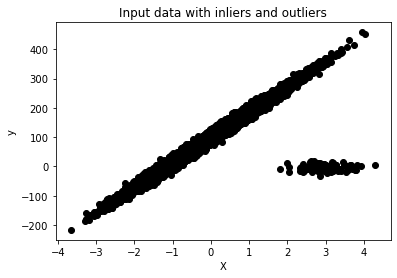

In [139]:
plot.figure()
plot.title("Input data with inliers and outliers")
plot.xlabel("X")
plot.ylabel("y")
plot.scatter(X, y, label='input data', color = 'black')


## Plotting only the inlier data after using the Ransac Regressor

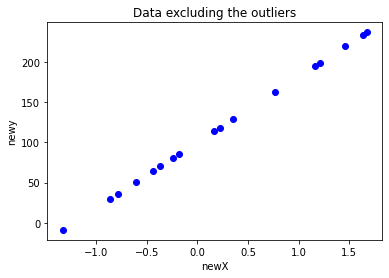

In [140]:
plot.figure()
plot.title("Data excluding the outliers")
plot.xlabel("newX")
plot.ylabel("newy")
plot.scatter(newX, newy, label='Inlier data', color = 'blue')

## Regression line when both inlier and outlier data are in picture

Regression line when both inlier and outlier data are in picture

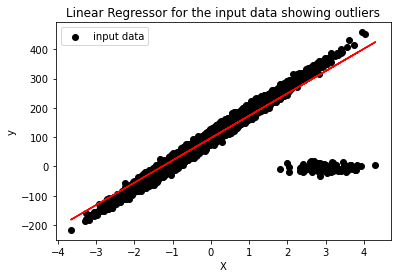

In [141]:
plot.figure()
plot.title("Linear Regressor for the input data showing outliers")
plot.xlabel("X")
plot.ylabel("y")
plot.scatter(X, y, label='input data',color = 'black')
model1 = linear_model.LinearRegression()
Train = model.fit(X, y)
plot.plot(X, model.predict(X),color = 'red')
plot.legend()
plot.show()

## Regression line for only the inlier data

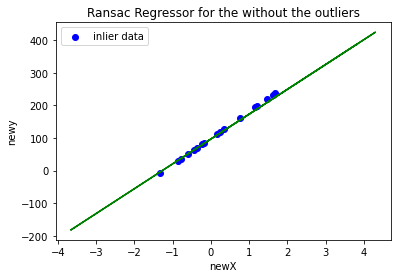

In [142]:
plot.figure()
plot.title("Ransac Regressor for the without the outliers")
plot.xlabel("newX")
plot.ylabel("newy")
plot.scatter(newX, newy, label='inlier data',color = 'blue')
model2 = linear_model.RANSACRegressor(residual_threshold = 0.01, loss = 'absolute_error')
Train = model.fit(X, y)
plot.plot(X, model.predict(X),color = 'green')
plot.legend()
plot.show()

##  Regression result with and without RANSAC

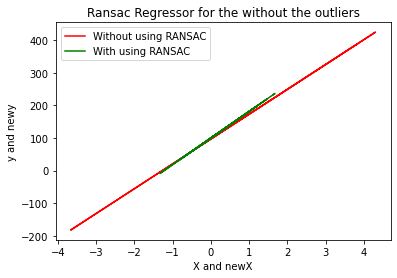

In [143]:
plot.figure()
plot.title("Ransac Regressor for the without the outliers")
plot.xlabel("X and newX")
plot.ylabel("y and newy")
model1 = linear_model.LinearRegression()
Train1 = model1.fit(X,y)
model2 = linear_model.RANSACRegressor(loss = 'absolute_error', residual_threshold= 0.01)
Train2 = model2.fit(newX,newy)
plot.plot(X, model1.predict(X), color='Red',label = "Without using RANSAC")
plot.plot(newX, model2.predict(newX), color='green', label = "With using RANSAC")
plot.legend()
plot.show()